#  PCA

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import clear_output

import pandas as pd
import numpy as np
classes = {0:'T-shirt/top',
           1:'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag', 
           9: 'Ankle Boot'}

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
selected_labels = [0, 1, 5, 8, 9]

data = pd.read_csv('fashion-mnist_train.csv')
data = data.loc[data['label'].isin(selected_labels)].reset_index(drop=True)

labels = data.pop('label')
index = 0
data = data.values
images = np.reshape(data, (-1, 28, 28))

<IPython.core.display.Javascript object>


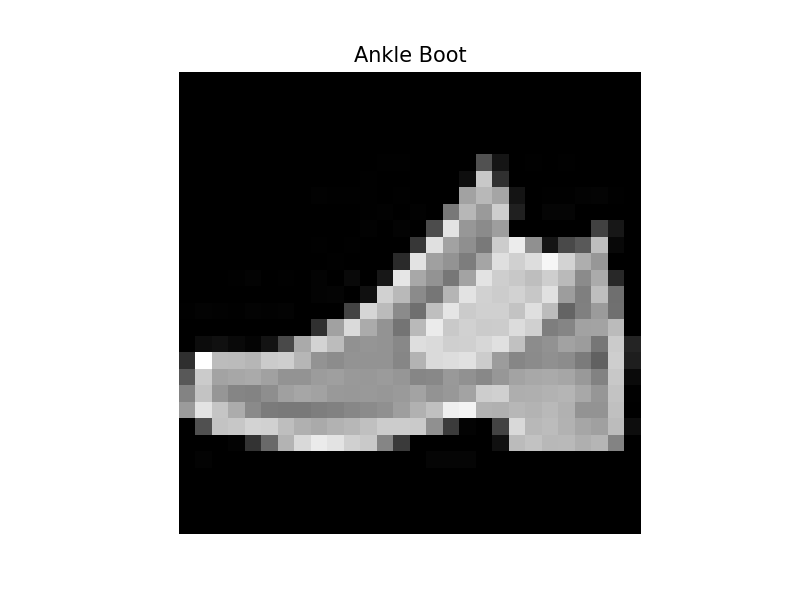

In [3]:

import matplotlib.pyplot as plt
plt.imshow(images[index].squeeze(), cmap = 'gray')
plt.title(classes[labels[index]])
plt.axis('off')
plt.show()
index += 1


In [4]:
mean_ = data.mean(axis =0)
std_ = data.std(axis=0)

X_scaled = (data-mean_)/std_

In [5]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:5, 0:5]

Shape of X_scaled: (30000, 784)
Shape of features: (784, 30000)
Shape of cov_matrix: (784, 784)

Sneak Peak of the covariance matrix:



array([[1.00003333, 0.10344873, 0.02532451, 0.02635544, 0.0259777 ],
       [0.10344873, 1.00003333, 0.67948885, 0.16289888, 0.05367159],
       [0.02532451, 0.67948885, 1.00003333, 0.29368204, 0.0353962 ],
       [0.02635544, 0.16289888, 0.29368204, 1.00003333, 0.55370309],
       [0.0259777 , 0.05367159, 0.0353962 , 0.55370309, 1.00003333]])

In [6]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)



print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')

First 10 eigenvalues: [153.06599858 134.58513832  53.62624634  45.83523074  35.94793614
  27.1722212   16.16894956  11.26325146   9.89960743   8.76881916]


Last 10 eigenvalues: [0.0299665  0.03232823 0.02958344 0.03207515 0.03218829 0.03185936
 0.03047201 0.02955674 0.03128741 0.03836895]


In [7]:
plt.figure(figsize=(5,3))
plt.stem(eig_values[:200], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

<IPython.core.display.Javascript object>

C:\Users\hp\AppData\Local\Temp\ipykernel_16576\2538849645.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(eig_values[:200], use_line_collection = True)


In [8]:
for i in range(200):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 19.523073518199535 % variance
Eigenvectors upto 2 expresses 36.68897302741589 % variance
Eigenvectors upto 3 expresses 43.52882746554156 % variance
Eigenvectors upto 4 expresses 49.37496303896841 % variance
Eigenvectors upto 5 expresses 53.96000613539761 % variance
Eigenvectors upto 6 expresses 57.425735147930126 % variance
Eigenvectors upto 7 expresses 59.488032417703955 % variance
Eigenvectors upto 8 expresses 60.924623746428374 % variance
Eigenvectors upto 9 expresses 62.187286686003894 % variance
Eigenvectors upto 10 expresses 63.305721235345864 % variance
Eigenvectors upto 11 expresses 64.34015921745105 % variance
Eigenvectors upto 12 expresses 65.303453770063 % variance
Eigenvectors upto 13 expresses 66.2215767242117 % variance
Eigenvectors upto 14 expresses 66.99535115019921 % variance
Eigenvectors upto 15 expresses 67.74056613252276 % variance
Eigenvectors upto 16 expresses 68.4381673582634 % variance
Eigenvectors upto 17 expresses 69.0614481592864

In [9]:
X_scaled[0].reshape((-1, 784)).shape

(1, 784)

In [10]:
eig_vectors[:, 0].reshape((784, -1)).shape

(784, 1)

In [11]:
result = np.dot(X_scaled.reshape((-1, 784)), eig_vectors[:,:50].reshape((784, -1)))
result.shape

(30000, 50)

In [12]:

projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Y'] = labels
res2d.head()

,PC1,PC2,Y
0,-13.846035,-3.141500,9
1,13.780054,8.119654,0
2,-4.080987,-20.163169,5
3,4.344533,0.808241,8
4,21.412902,19.844596,0


<IPython.core.display.Javascript object>


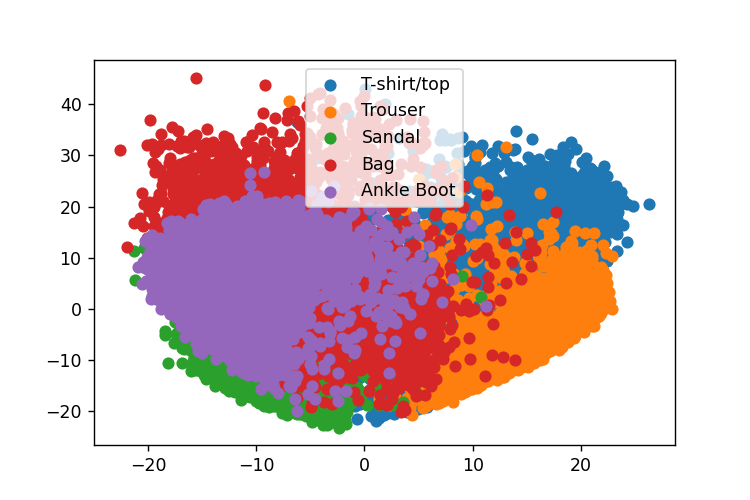

In [13]:

plt.figure(figsize=(6,4))
for label in selected_labels:
    label_name = classes[label]
    coords = res2d[res2d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)

plt.legend()
plt.show()

In [14]:

projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
projected_3 = X_scaled.dot(eig_vectors.T[2])
res3d = pd.DataFrame(projected_1, columns=['PC1'])
res3d['PC2'] = projected_2
res3d['PC3'] = projected_3
res3d['Y'] = labels
res3d = res3d.head(500)

<IPython.core.display.Javascript object>


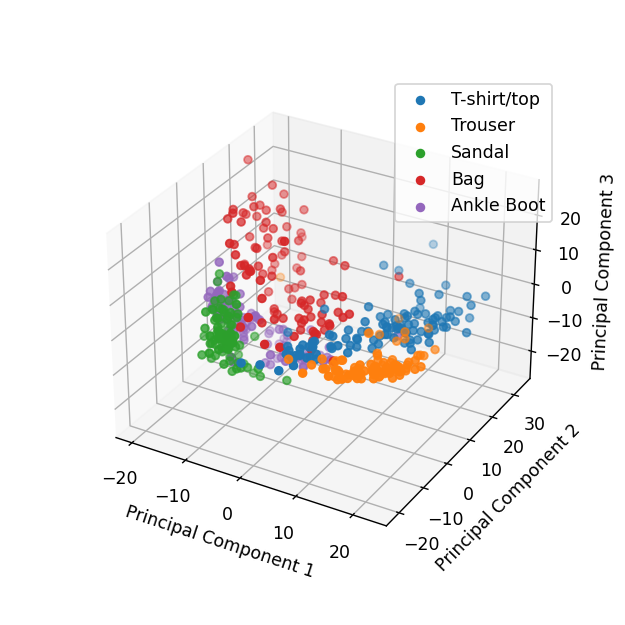

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

for label in selected_labels:
    label_name = classes[label]
    coords = res3d[res3d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    z = coords['PC3'].values
    ax.scatter3D(x, y, z, label=label_name)
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

In [17]:
reduced_eigen_space = eig_vectors[:, :350]

In [18]:
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_scaled: (30000, 784)
Shape of reduced_eigen_space: (784, 350)
Shape of X_compressed: (30000, 350)


In [19]:

print(f'Shape of X_compressed: {X_compressed.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_compressed: (30000, 350)
Shape of reduced_eigen_space: (784, 350)
Shape of X_reconstructed: (30000, 784)


In [22]:
rec_index = 0

In [23]:
data_reconstructed = (X_reconstructed * std_ ) + mean_
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))

<IPython.core.display.Javascript object>


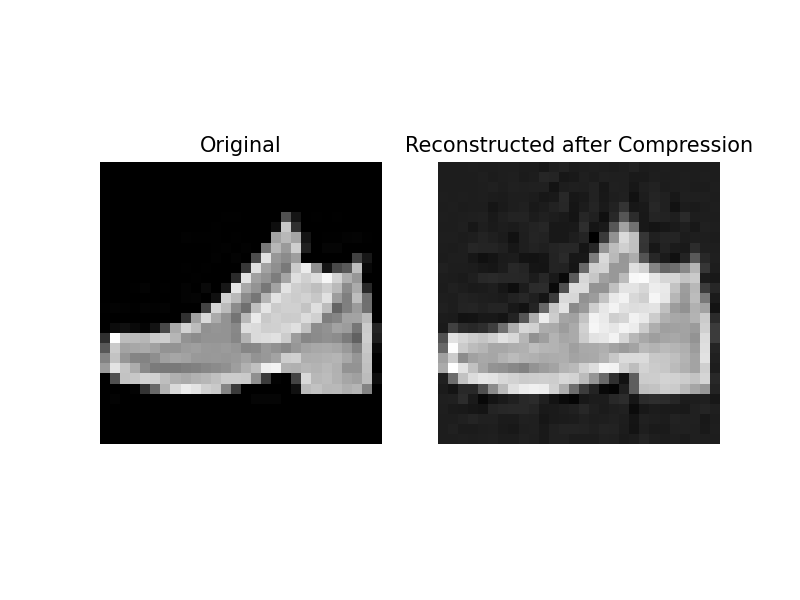

In [24]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(images[rec_index].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[rec_index].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)
rec_index +=1